# Experiment 1
## Test if marginal distribution works well

In [5]:
%load_ext autoreload
%autoreload 1
%aimport my_classes.NeuralCopula

import numpy as np
from scipy.stats import norm, multivariate_normal, multivariate_t, t
import torch
from statsmodels.graphics.gofplots import qqplot
from my_classes.NeuralCopula import MarginalModel, CopulaModel, NeuralCopula
from matplotlib import pyplot as plt
from scipy.stats import norm, t, uniform, expon, laplace, lognorm
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Training model for Gaussian distribution
Training model
Epoch 0, Loss: 18.387842178344727, Constraint losses: L1: 16.387556076049805, L2: 0.0001217599055962637, L3: 1.0000817775726318, L4: 1.0000817775726318
Epoch 500, Loss: -0.5734564661979675, Constraint losses: L1: -0.597518265247345, L2: 0.0, L3: 0.012079477310180664, L4: 0.011982293799519539
Epoch 1000, Loss: -0.6021479964256287, Constraint losses: L1: -0.6091101765632629, L2: 0.0, L3: 0.0035306811332702637, L4: 0.003431499470025301
Epoch 1500, Loss: -0.6076182723045349, Constraint losses: L1: -0.6111748218536377, L2: 0.0, L3: 0.001828014850616455, L4: 0.0017285309731960297
Epoch 2000, Loss: -0.6096929907798767, Constraint losses: L1: -0.6118758916854858, L2: 0.0, L3: 0.0011413097381591797, L4: 0.001041607465595007
Epoch 2500, Loss: -0.6107091307640076, Constraint losses: L1: -0.6122035980224609, L2: 0.0, L3: 0.0007970929145812988, L4: 0.0006973901763558388
Epoch 3000, Loss: -0.6112770438194275, Constraint losses: L1: -0.612375676

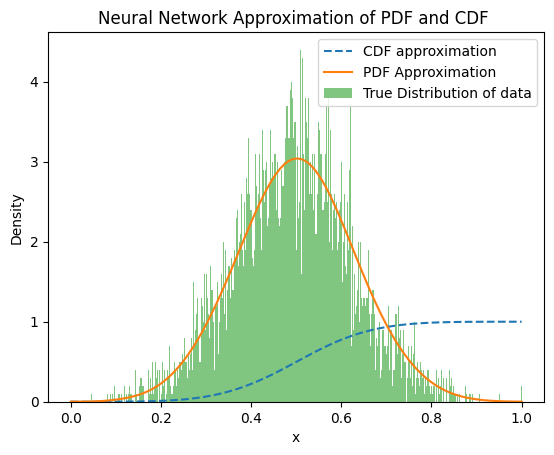

Training model for Student-t distribution
Training model
Epoch 0, Loss: 10.219905853271484, Constraint losses: L1: 8.220358848571777, L2: 5.243354621597973e-07, L3: 0.9997734427452087, L4: 0.9997735023498535
Epoch 500, Loss: -1.6925827264785767, Constraint losses: L1: -1.697604775428772, L2: 0.0, L3: 0.002560734748840332, L4: 0.0024612597189843655
Epoch 1000, Loss: -1.698305368423462, Constraint losses: L1: -1.7001230716705322, L2: 0.0, L3: 0.0009588003158569336, L4: 0.0008589564822614193
Epoch 1500, Loss: -1.6993279457092285, Constraint losses: L1: -1.7004345655441284, L2: 0.0, L3: 0.0006031990051269531, L4: 0.0005033908528275788
Epoch 2000, Loss: -1.6997109651565552, Constraint losses: L1: -1.7005717754364014, L2: 0.0, L3: 0.00048047304153442383, L4: 0.0003804248699452728
Epoch 2500, Loss: -1.6999542713165283, Constraint losses: L1: -1.7006553411483765, L2: 0.0, L3: 0.00040036439895629883, L4: 0.000300645362585783
Epoch 3000, Loss: -1.7000818252563477, Constraint losses: L1: -1.70069

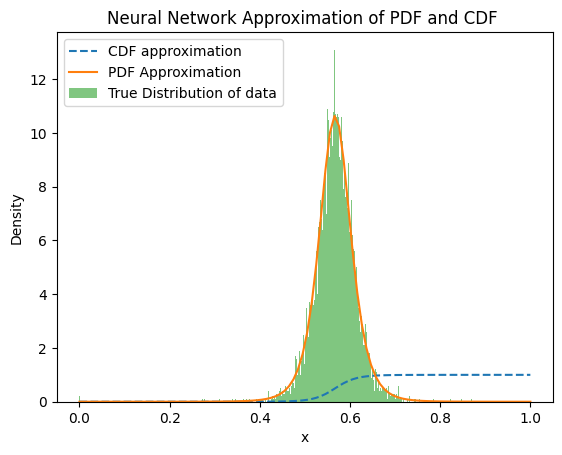

Training model for Uniform distribution
Training model
Epoch 0, Loss: 7.50186014175415, Constraint losses: L1: 5.510064601898193, L2: 0.0, L3: 0.9958979487419128, L4: 0.9958978891372681
Epoch 500, Loss: 0.018269751220941544, Constraint losses: L1: 0.010056577622890472, L2: 0.0, L3: 0.004144608974456787, L4: 0.004068565554916859
Epoch 1000, Loss: 0.008739179000258446, Constraint losses: L1: 0.0056825741194188595, L2: 0.0, L3: 0.0015634894371032715, L4: 0.001493115909397602
Epoch 1500, Loss: 0.007422300986945629, Constraint losses: L1: 0.005270636174827814, L2: 0.0, L3: 0.0011087656021118164, L4: 0.0010428994428366423
Epoch 2000, Loss: 0.0060039120726287365, Constraint losses: L1: 0.004332570359110832, L2: 0.0, L3: 0.0008671879768371582, L4: 0.0008041536784730852
Epoch 2500, Loss: 0.004959895275533199, Constraint losses: L1: 0.003592337714508176, L2: 0.0, L3: 0.0007142424583435059, L4: 0.000653315510135144
Epoch 3000, Loss: 0.004257821477949619, Constraint losses: L1: 0.00308402185328304

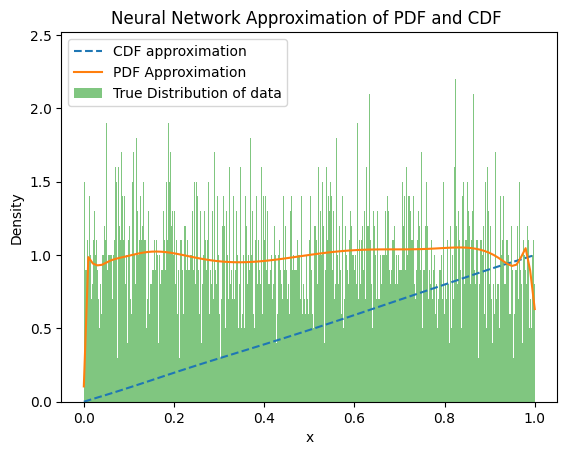

Training model for Exponential distribution
Training model
Epoch 0, Loss: 20.431455612182617, Constraint losses: L1: 18.420686721801758, L2: 0.003589577041566372, L3: 1.0035896301269531, L4: 1.0035896301269531
Epoch 500, Loss: -1.1298243999481201, Constraint losses: L1: -1.1377092599868774, L2: 0.0, L3: 0.003962099552154541, L4: 0.003922705538570881
Epoch 1000, Loss: -1.1409629583358765, Constraint losses: L1: -1.146376609802246, L2: 0.0, L3: 0.0027019381523132324, L4: 0.002711688634008169
Epoch 1500, Loss: -1.141910195350647, Constraint losses: L1: -1.1482237577438354, L2: 0.0, L3: 0.003104686737060547, L4: 0.0032088831067085266
Epoch 2000, Loss: -1.1440075635910034, Constraint losses: L1: -1.1490135192871094, L2: 0.0, L3: 0.0024453401565551758, L4: 0.0025606690905988216
Epoch 2500, Loss: -1.1452863216400146, Constraint losses: L1: -1.1495593786239624, L2: 0.0, L3: 0.002075016498565674, L4: 0.002198002999648452
Epoch 3000, Loss: -1.1462147235870361, Constraint losses: L1: -1.150011301

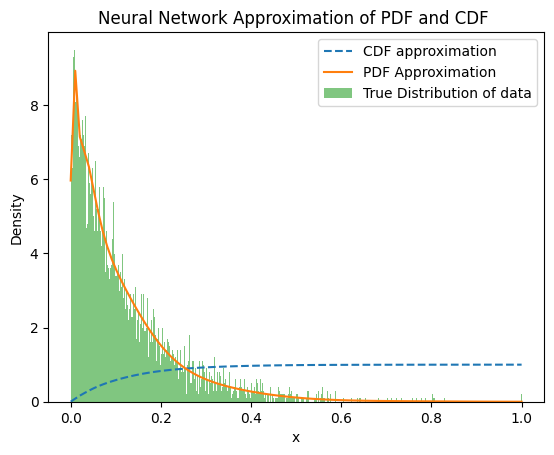

Training model for Laplace distribution
Training model
Epoch 0, Loss: 9.575822830200195, Constraint losses: L1: 7.576822280883789, L2: 0.0, L3: 0.9995001554489136, L4: 0.9995001554489136
Epoch 500, Loss: -1.1740778684616089, Constraint losses: L1: -1.1792067289352417, L2: 0.0, L3: 0.002614140510559082, L4: 0.0025147576816380024
Epoch 1000, Loss: -1.1912267208099365, Constraint losses: L1: -1.193278193473816, L2: 0.0, L3: 0.0010755658149719238, L4: 0.0009758397936820984
Epoch 1500, Loss: -1.192315697669983, Constraint losses: L1: -1.1934990882873535, L2: 0.0, L3: 0.0006415247917175293, L4: 0.0005417951615527272
Epoch 2000, Loss: -1.1942733526229858, Constraint losses: L1: -1.195218801498413, L2: 0.0, L3: 0.0005226731300354004, L4: 0.0004228328471072018
Epoch 2500, Loss: -1.172574758529663, Constraint losses: L1: -1.1733320951461792, L2: 0.0, L3: 0.000428617000579834, L4: 0.00032882607774809003
Epoch 3000, Loss: -1.1954281330108643, Constraint losses: L1: -1.196047067642212, L2: 0.0, L3:

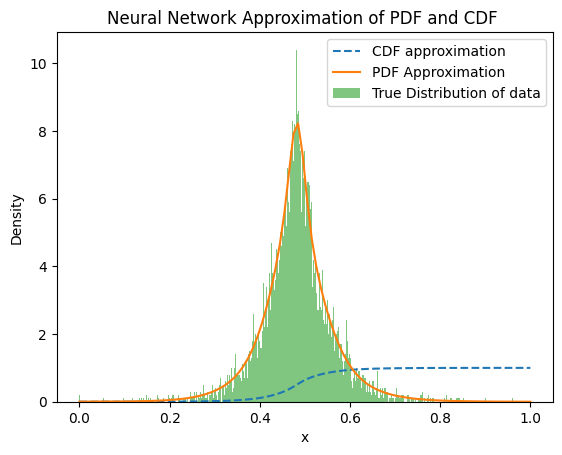

Training model for LogNormal distribution
Training model
Epoch 0, Loss: 20.422122955322266, Constraint losses: L1: 18.420686721801758, L2: 0.00047811746480874717, L3: 1.0004781484603882, L4: 1.0004780292510986
Epoch 500, Loss: -2.2459795475006104, Constraint losses: L1: -2.252584934234619, L2: 0.0, L3: 0.003311336040496826, L4: 0.003294084221124649
Epoch 1000, Loss: -2.2548558712005615, Constraint losses: L1: -2.256983995437622, L2: 0.0, L3: 0.001091301441192627, L4: 0.0010369359515607357
Epoch 1500, Loss: -2.255995273590088, Constraint losses: L1: -2.257288694381714, L2: 0.0, L3: 0.000680088996887207, L4: 0.0006132498383522034
Epoch 2000, Loss: -2.2527456283569336, Constraint losses: L1: -2.2559280395507812, L2: 0.0, L3: 0.0016141533851623535, L4: 0.0015683260280638933
Epoch 2500, Loss: -2.256751537322998, Constraint losses: L1: -2.2576942443847656, L2: 0.0, L3: 0.000507056713104248, L4: 0.00043554097646847367
Epoch 3000, Loss: -2.2127041816711426, Constraint losses: L1: -2.2132787704

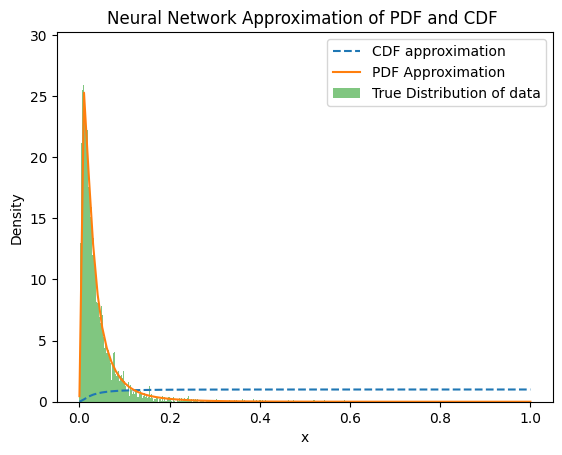

In [3]:
np.random.seed(0)
torch.manual_seed(0)
## Create dictionary with datasets from different distributions
datasets = {
    'Gaussian': np.random.normal(size=10000),
    'Student-t': np.random.standard_t(df=5, size=10000),
    'Uniform': np.random.uniform(size=10000),
    'Exponential': np.random.exponential(size=10000),
    'Laplace': np.random.laplace(size=10000),
    'LogNormal': np.random.lognormal(size=10000),
}


scaling = 1.0
modelDict = {}
for name, data in datasets.items():
    #Normalize the data
    print(f"Training model for {name} distribution")
    model = MarginalModel(num_layers=6, num_neurons=10, lr=0.01)
    data_tensor = model.CreateNormalizedTensor(data, scaling=scaling)
    # Train the model on the dataset
    model.train_model(data_tensor, epochs=5000, log_interval=500)
    model.PlotModel()
    modelDict[name] = model
    
    # xPlot = np.linspace(np.min(data), np.max(data), 1000)
    # xPlotTensor = model.CreateNormalizedTensor(xPlot, scaling=scaling)[:-2,:]  # Exclude the last two points
    # CDF_plot = model.evaluateCDFData(xPlotTensor)
    # PDF_plot = model.evaluatePDFData(xPlotTensor)

    # dist = distributions[name][0]
    # params = distributions[name][1]
    # dist_obj = dist(**params)
    # trueCDF = dist_obj.cdf(xPlot)
    # truePDF = dist_obj.pdf(xPlot)

    # plt.hist(data, bins=50, density=True, alpha=0.5, label=f"Histogram of {name} data")
    # plt.plot(xPlot, PDF_plot, label=f"Estimated PDF")
    # plt.plot(xPlot, CDF_plot, label=f"Estimated CDF")
    # plt.plot(xPlot, truePDF, label=f"True PDF", linestyle='--')
    # plt.plot(xPlot, trueCDF, label=f"True CDF", linestyle='--')  
    # plt.title(f"PDF and CDF of {name} data")
    # plt.xlabel("Value")
    # plt.ylabel("Density")
    
    




In [15]:
df  = pd.DataFrame(columns=['Total Loss', 'L1', 'L2', 'L3', 'L4'])

for name, data in datasets.items():
    print(f"Final loss for {name} distribution")
    data_tensor = model.CreateNormalizedTensor(data, scaling=scaling)
    
    modelDict[name].loss_function(data_tensor)
    loss, L1, L2, L3, L4 = modelDict[name].loss_function(data_tensor)
    
    df.loc[name] = {
        'Total Loss': loss.detach().numpy()[0,0],
        'L1': L1.detach().numpy(),
        'L2': L2.detach().numpy(),
        'L3': L3.detach().numpy(),
        'L4': L4.detach().numpy()[0,0]
    }

print(df.to_latex('losses.tex', index=True,  escape=False))


Final loss for Gaussian distribution
Final loss for Student-t distribution
Final loss for Uniform distribution
Final loss for Exponential distribution
Final loss for Laplace distribution
Final loss for LogNormal distribution
None


Validating neural copula against true model for Gaussian distribution


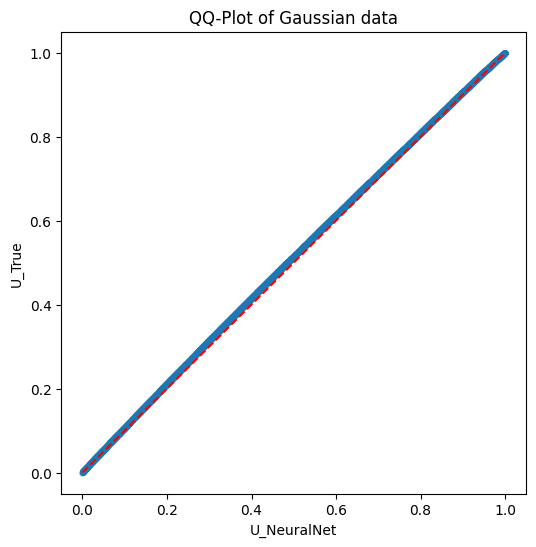

Mean Squared Error for Gaussian distribution: 0.0106
Mean Error for Gaussian distribution: -0.0106
9981
------------------------------------------------------------
Validating neural copula against true model for Student-t distribution


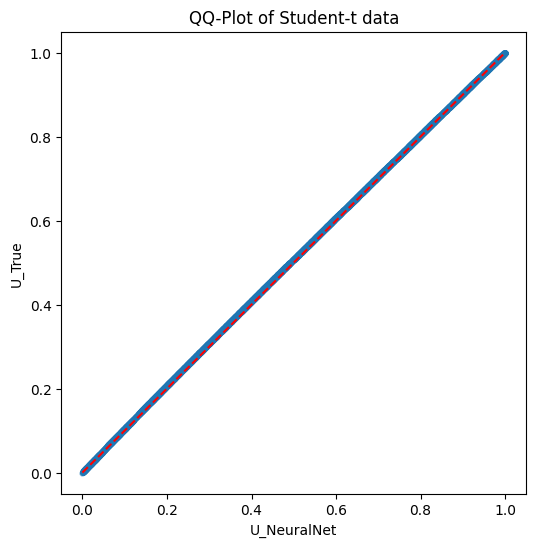

Mean Squared Error for Student-t distribution: 0.0057
Mean Error for Student-t distribution: -0.0056
9888
------------------------------------------------------------
Validating neural copula against true model for Uniform distribution


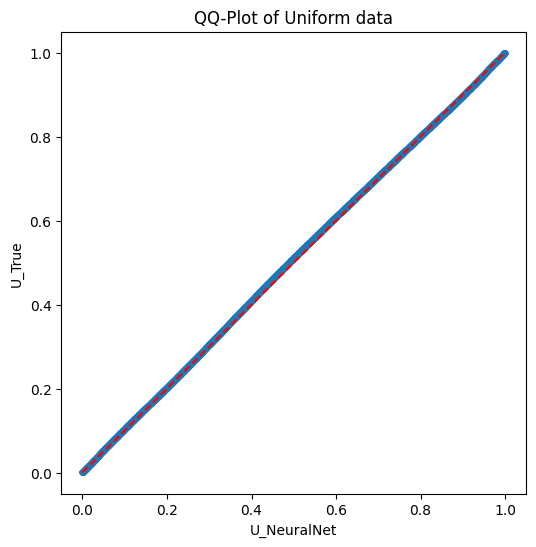

Mean Squared Error for Uniform distribution: 0.0051
Mean Error for Uniform distribution: -0.0046
8374
------------------------------------------------------------
Validating neural copula against true model for Exponential distribution


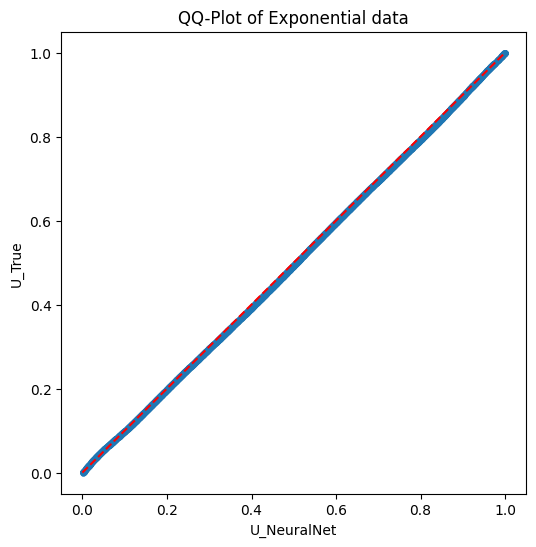

Mean Squared Error for Exponential distribution: 0.0047
Mean Error for Exponential distribution: 0.0043
788
------------------------------------------------------------
Validating neural copula against true model for Laplace distribution


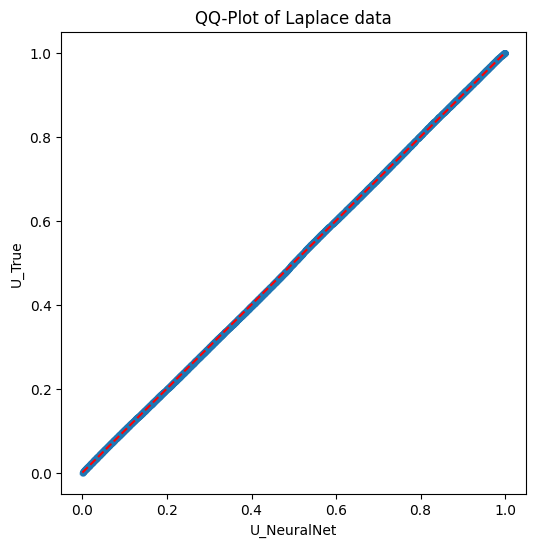

Mean Squared Error for Laplace distribution: 0.0017
Mean Error for Laplace distribution: -0.0002
6182
------------------------------------------------------------
Validating neural copula against true model for LogNormal distribution


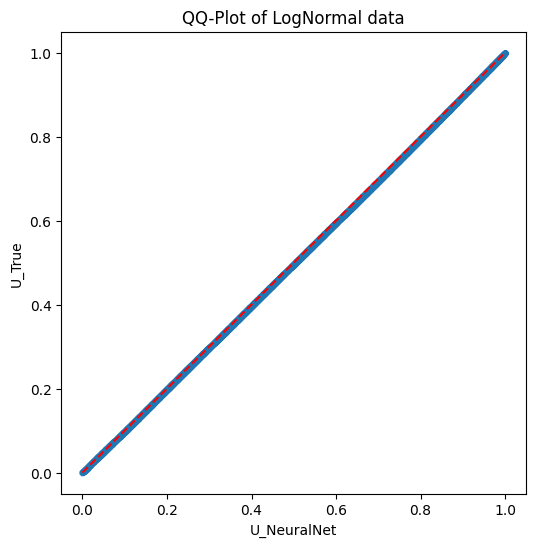

Mean Squared Error for LogNormal distribution: 0.0036
Mean Error for LogNormal distribution: 0.0036
181
------------------------------------------------------------


In [4]:
# Distributions and their parameters
distributions = {
    'Gaussian': (norm, {'loc': 0, 'scale': 1}),
    'Student-t': (t, {'df': 5}),
    'Uniform': (uniform, {'loc': 0, 'scale': 1}),
    'Exponential': (expon, {'scale': 1}),
    'Laplace': (laplace, {'loc': 0, 'scale': 1}),
    'LogNormal': (lognorm, {'s': 1.0, 'loc': 0.0, 'scale': np.exp(0.0)}),
}

for name, data in datasets.items(): 
    print(f"Validating neural copula against true model for {name} distribution")
    ## Data as tensor
    #data_tensor = torch.tensor(data, dtype=torch.float32).view(-1, 1)
    data_tensor = model.CreateNormalizedTensor(data, scaling=scaling)[:-2,:]  # Exclude the last two points
    U_NeuralNet = modelDict[name].evaluateCDFData(data_tensor)

    dist = distributions[name][0]
    params = distributions[name][1]
    dist_obj = dist(**params)
    U_True = dist_obj.cdf(data)

    plt.figure(figsize=(6, 6))
    plt.scatter(U_NeuralNet, U_True, alpha=0.5, label=f"{name} data", s=12)
    plt.xlabel("U_NeuralNet")
    plt.ylabel("U_True")
    plt.title(f"QQ-Plot of {name} data")
    plt.plot([0, 1], [0, 1], 'r--', label='y=x')
    plt.show()

    U_NeuralNet = U_NeuralNet.flatten()
    mse = np.mean(np.abs(U_NeuralNet - U_True))
    print(f"Mean Squared Error for {name} distribution: {mse:.4f}")
    meanError = np.mean(U_NeuralNet - U_True)
    print(f"Mean Error for {name} distribution: {meanError:.4f}")
    print(np.count_nonzero(U_NeuralNet < U_True))
    print('------------------------------------------------------------')
    